In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 1. Explore the relationship among debt, years employed, credit score, and the card approving status.
# Please use one single graph to express such information.

In [65]:
df = pd.read_csv ('clean_dataset.csv')

In [66]:
df2 = df[['Debt', 'YearsEmployed', 'CreditScore', 'Approved']]
df2.head()

,Debt,YearsEmployed,CreditScore,Approved
0,0.000,1.25,1,1
1,4.460,3.04,6,1
2,0.500,1.50,0,1
3,1.540,3.75,5,1
4,5.625,1.71,0,1


In [67]:
df2.iloc[0,:]

Debt             0.00
YearsEmployed    1.25
CreditScore      1.00
Approved         1.00
Name: 0, dtype: float64

In [68]:
df3 = df2.iloc[:, :]
df3.head()

,Debt,YearsEmployed,CreditScore,Approved
0,0.000,1.25,1,1
1,4.460,3.04,6,1
2,0.500,1.50,0,1
3,1.540,3.75,5,1
4,5.625,1.71,0,1


In [69]:
correlation = df3.corr()
correlation

,Debt,YearsEmployed,CreditScore,Approved
Debt,1.000000,0.298902,0.271207,0.206294
YearsEmployed,0.298902,1.000000,0.322330,0.322475
CreditScore,0.271207,0.322330,1.000000,0.406410
Approved,0.206294,0.322475,0.406410,1.000000


In [70]:
tri_matrix = np.triu(correlation)
print(tri_matrix)

[[1.         0.29890156 0.27120674 0.20629374]
 [0.         1.         0.32232967 0.32247536]
 [0.         0.         1.         0.40641001]
 [0.         0.         0.         1.        ]]


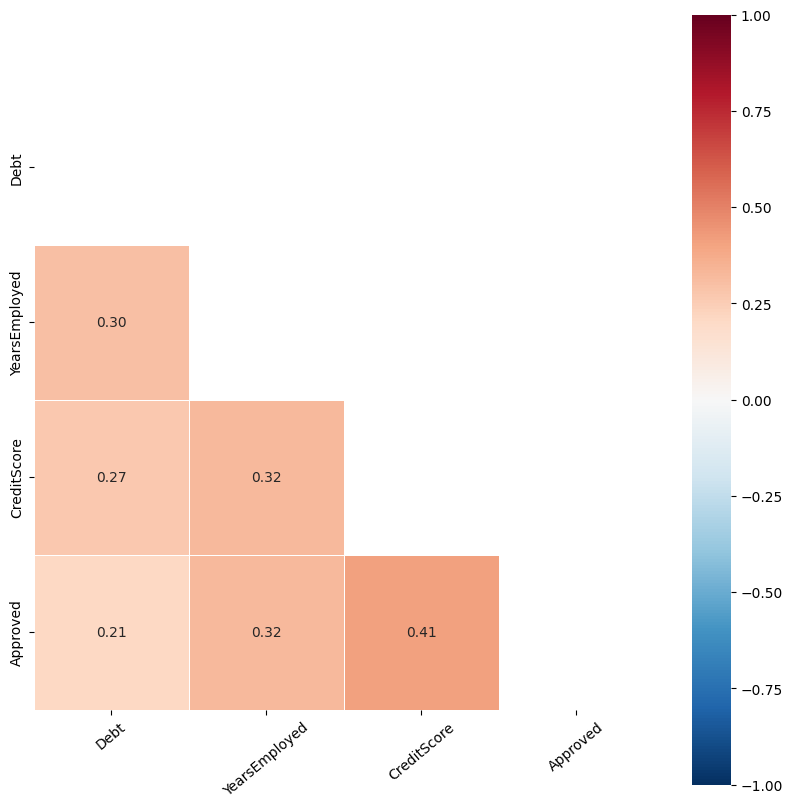

In [71]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, square=True, cmap='RdBu_r',fmt='.2f', annot=True, linewidth=0.5, vmin=-1, vmax=1,
            mask=tri_matrix)
plt.xticks(rotation=40)
plt.show()

I used a correlation coefficient heatmap to analyze the relationship between Debt, YearsEmployed, CreditScore, and Approval Status since most of these fields are continuous numeric values and not categorical (Approval Status is the only categorical field).

The heatmap shows that Approval Status and CreditScore have the strongest positive correlation at 0.41. In other words, the higher the credit score, the more likely the customer is to be approved.

Debt and Approval Status have the weakest positive correlation at 0.21. Meaning that having high or low debt does not necessarily determine whether or not the customer will be approved.




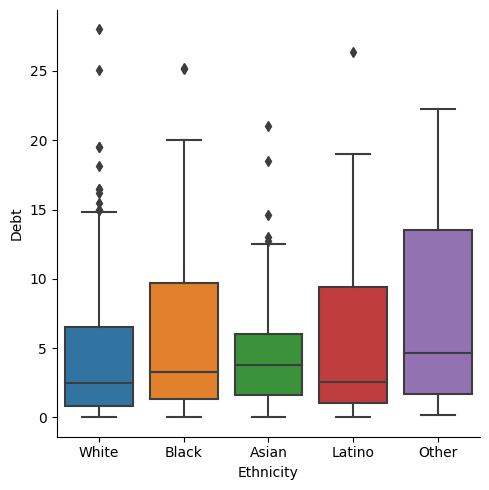

In [7]:
# 2. Use proper visualization tool to find which ethnicity group carries the highest amount of debt
sns.catplot(data=df, x='Ethnicity', y='Debt',kind='box')
plt.show()

There are outliers in the White ethnicity that have the highest recorded debt. However at the group level, those in "Other" ethnicity have both the highest maximum amount of debt and the highest upper quartile of debt.

In [53]:
# 3. Let's say Daniel carries 900 debt, his credit score is 800, and his income is 1000.
# Select a proper visualization you learned from this class to express such information.

attributes = ['Debt','Credit Score', 'Income']
values = [900, 800, 1000]
values += values[:1]
values

[900, 800, 1000, 900]

In [54]:
angles = np.linspace(0, 2*np.pi, 3, endpoint=False).tolist()
angles += angles[:1]
angles

[0.0, 2.0943951023931953, 4.1887902047863905, 0.0]

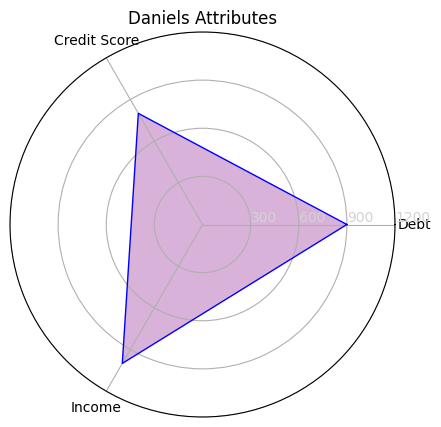

In [73]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], attributes)

ax.set_rlabel_position(0)
plt.yticks([300, 600, 900, 1200], ['300','600','900','1200'], color='lightgrey', size=10)
plt.ylim(0,1200)
plt.title('Daniels Attributes')

ax.plot(angles, values, linewidth=1, linestyle='solid', color='blue')
ax.fill(angles, values, 'b', alpha=0.3, facecolor='purple')

plt.show()

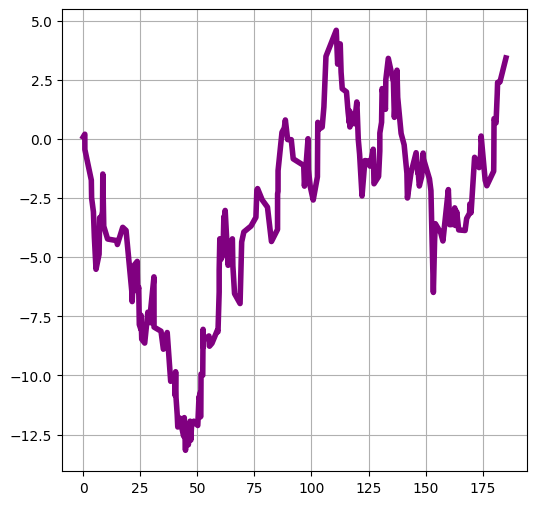

In [76]:
# 4. Let's create a 2D random walk with 200 steps in a 2D coordinate system.
# Each step on y-axis follows the normal distribution.
# Each step on x-axis follows an exponential distribution.
# You can use np.random.exponential() function to construct the required steps.
# The exponential function contains two arguments: size of the steps (just like the normal distribution function we learned)
# and scale. You can set the scale = 1.

n_steps = 200
x_steps = np.random.exponential(1,size=n_steps)
x = np.cumsum(x_steps)
y_steps = np.random.normal(size=n_steps)
y = np.cumsum(y_steps)

plt.figure(figsize=(6,6))
plt.plot(x,y,color='purple', linewidth=4)
plt.grid(True)
plt.show()


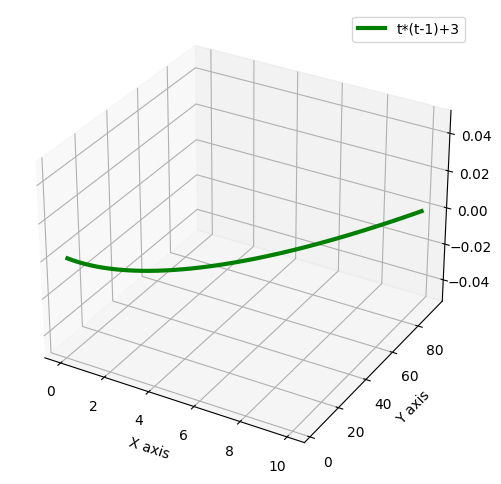

In [77]:
# 5. Let's say a time series function is determined by the product of current time point t,
# its previous time point (t-1), and a constant 3. Please visualize this time series in 3D coordinate system.
# time series function = t*(t-1)+3

x_line = np.linspace(0, 10, 100)
y_line = x_line*(x_line - 1) +3
z_line = np.zeros_like(x_line)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

ax.plot(x_line, y_line, z_line, color='green', label='t*(t-1)+3',linewidth=3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.legend()
plt.show()
